In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('../data/TG_STAID002759.txt') as f:
    df = pd.read_csv('../data/TG_STAID002759.txt',decimal=',',skiprows=range(0,18),parse_dates=True)
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('___','').str.replace('_','')
    df['date']=pd.to_datetime(df['date'].astype('str'),format ='%Y%m%d')
    df=df.set_index(keys = 'date', drop = False, append = False, 
                   #verify_integrity=10, improve the performance
                  )

<ipython-input-2-8df6baf03cb6>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('___','').str.replace('_','')


In [3]:
df_cal = df.loc[(df['date']>='2015-01-01')]

<AxesSubplot:ylabel='date'>

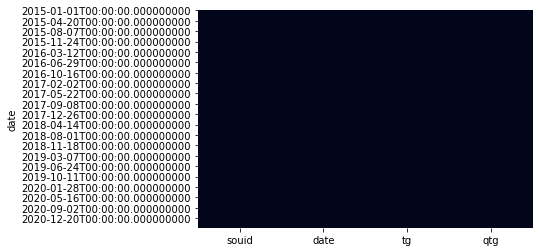

In [4]:
sns.heatmap(df_cal.isnull(),cbar=False)

In [5]:
df_cal.head()

,souid,date,tg,qtg
date,,,,
2015-01-01,111448,2015-01-01,39,0
2015-01-02,111448,2015-01-02,54,0
2015-01-03,111448,2015-01-03,48,0
2015-01-04,111448,2015-01-04,36,0
2015-01-05,111448,2015-01-05,34,0


In [6]:
def cal_mat(df,w):
    mat = []
    for i in range(len(df['tg'])):
        mat.append(np.sum(df_cal['tg'][i:i+w])/w)
    return mat
df_cal['mat']=cal_mat(df_cal,29)    

<ipython-input-6-ea5adbb61b8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal['mat']=cal_mat(df_cal,29)


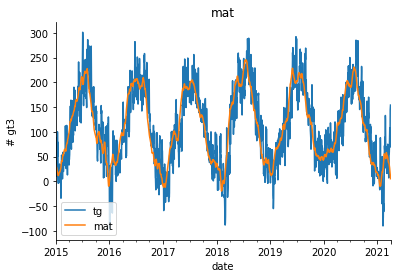

In [7]:
def plot_temp(df,title,ylim=True):
    # pandas plotting, it is easier
    
    df.plot()
    plt.title(title)
    #plt.xlabel('')
    sns.despine()
    plt.ylabel('# gt3')
    #if ylim:
        #plt.ylim(ymin = 0)
plot_temp(df_cal[['tg','mat']],'mat')

In [8]:
# calulate SF
df_cal['sf'] = df_cal['tg']/df_cal['mat']

<ipython-input-8-9423e644cd48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal['sf'] = df_cal['tg']/df_cal['mat']


In [9]:
df_cal.head()

,souid,date,tg,qtg,mat,sf
date,,,,,,
2015-01-01,111448,2015-01-01,39,0,34.482759,1.131000
2015-01-02,111448,2015-01-02,54,0,33.482759,1.612770
2015-01-03,111448,2015-01-03,48,0,31.793103,1.509761
2015-01-04,111448,2015-01-04,36,0,30.517241,1.179661
2015-01-05,111448,2015-01-05,34,0,29.655172,1.146512


In [12]:
# calulate SI, i will need to average all the sf in vertical time, ever 01-01, 01-02, 01-03 ...... 

In [11]:
df_cal['MM-DD'] = df_cal.iloc[:,1].dt.strftime('%m-%d')

<ipython-input-11-0a5da2c852df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal['MM-DD'] = df_cal.iloc[:,1].dt.strftime('%m-%d')


In [43]:
SI = pd.DataFrame(df_cal.groupby('MM-DD')['sf'].mean())

In [70]:
df =pd.DataFrame(df_cal['sf']<=0)

False    2136
True      146
Name: sf, dtype: int64